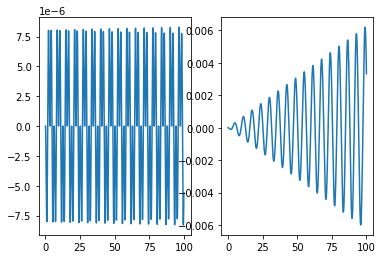

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#problem 1

'''Use RK4 to solve theta_tt+(g/L)*sin(theta)=0 for theta <<1 and compare with first two order asymptotic solutions solved 
by introducting slow time'''

#initial conditions



#rhs function
def f(x):
  return -np.sin(x)
#modified rhs function
def F(x):
  F=np.zeros([2])
  F[0]=x[1]
  F[1]=f(x[0])
  return F


def pend_rk4(dt,u_0,du_0):
   #parameters-g,L(length),dt-time spacing
   t=np.arange(0,100+dt,dt)
   N=len(t)
   #let v=du/dt and U be the [N,2] array for u,v
   U=np.zeros([2,N])
   U[0,0]=u_0
   U[1,0]=du_0

   #generating the solution array
   for i in range(N-1):
     k_1=F(U[:,i])
     k_2=F(U[:,i]+(dt/2)*k_1)
     k_3=F(U[:,i]+(dt/2)*k_2)
     k_4=F(U[:,i]+dt*k_3)
     U[:,i+1]=U[:,i]+(1/6)*dt*(k_1+2*k_2+2*k_3+k_4)
   return U[0]

def pend_plot(dt,u_0,du_0):
  t=np.arange(0,100+dt,dt)
  plt.plot(t,pend_rk4(dt,u_0,du_0))
  plt.title('rk-4 solution')


#pend_plot(0.01,0.1,0)

#asymptotic solution
#note: when we get the solution for theta ,we need to find A(0),by using theta(0)=u_0 we get Re(A(0)) ,to find Im(A(0)) I tried values because otherwise we need to solve a quintic

def plot_asymp(epsilon,dt):
  t=np.arange(0,100+dt,dt)
  #asymptotic solution
  asymp_sol=epsilon*np.cos((1-epsilon**2/8)*t)
  plt.plot(t,asymp_sol)

def error_plot(epsilon,dt):
  t=np.arange(0,100+dt,dt)
  asymp_sol=epsilon*np.cos((1-epsilon**2/16)*t)
  leading_asymp_sol=epsilon*np.cos(t)
  u_0=epsilon
  du_0=0
  error1 =asymp_sol-pend_rk4(dt,u_0,du_0)
  error2=leading_asymp_sol-pend_rk4(dt,u_0,du_0)
  plt.subplot(121)
  plt.plot(t,error1)
  plt.subplot(122)
  plt.plot(t,error2)


#plot_asymp(0.1,0.01)
error_plot(0.1,0.01)





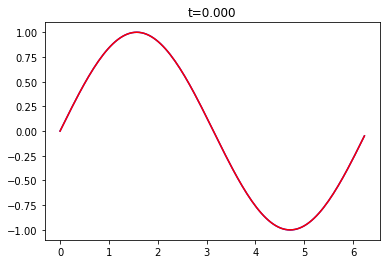

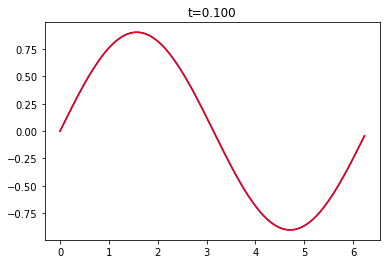

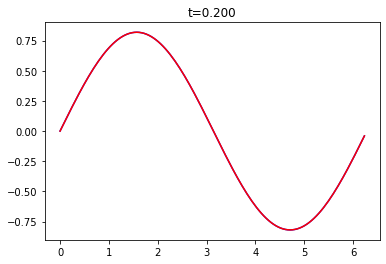

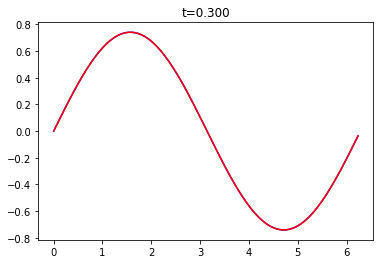

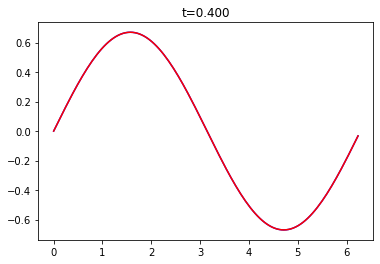

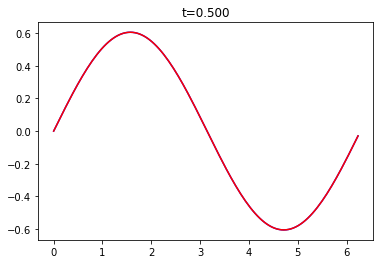

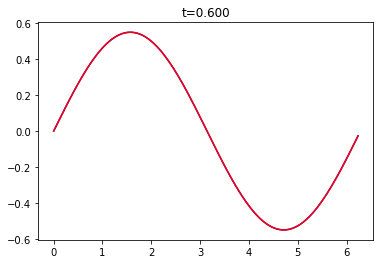

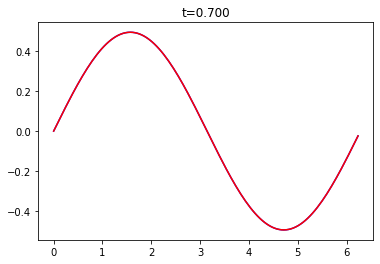

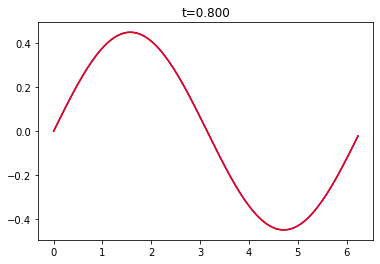

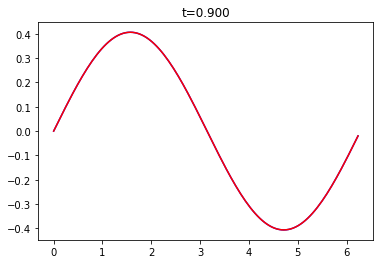

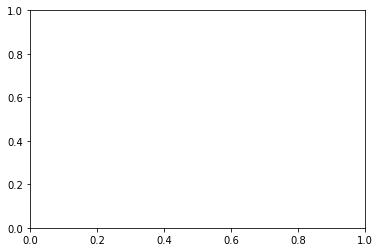

In [ ]:
#problem 2

'''Solve u_t=u_xx with u=sinx at time t=0 spectrally'''

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftfreq,fft,ifft

pi=np.pi
N=128
dx=2*pi/N
#list of wave numbers for that interval
k=fftfreq(N,d=1./N)

#space points
x=np.arange(0,N*dx,dx)

#time points
tMax=1
dt=0.0001
Nt=int(tMax/dt)

#initial condition
u=np.sin(x)
uk=fft(u) #fft of initial data

#getting fourier co-efficients of u_xx
def getrhs(u1):
    Ru=-(k**2)*u1
    return Ru

#rk-4 on uk
for i in range(0,Nt):
    u1=uk
    t=i*dt

    qu1=getrhs(u1)
    u1=uk+dt*qu1/2

    qu2=getrhs(u1)
    u1=uk+dt*qu2/2

    qu3=getrhs(u1)
    u1=uk+dt*qu3

    qu4=getrhs(u1)

    uk=uk+dt*(qu1+2*qu2+2*qu3+qu4)/6

    u=np.real(ifft(uk))

    if (i%1000==0):
        v=np.exp(-t)*np.sin(x)
        plt.plot(x,v,'b')
        plt.plot(x,u,'r')
        plt.title('t=%.3f' %t)
        plt.show()
        plt.pause(.5)
        plt.cla()


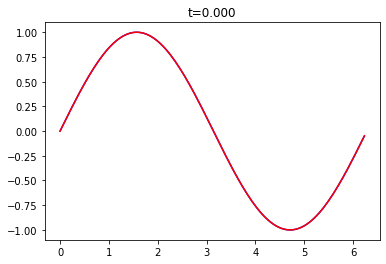

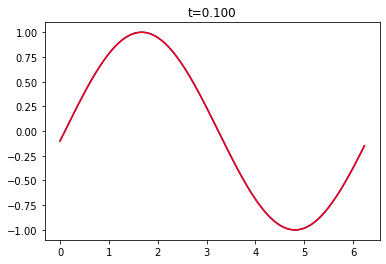

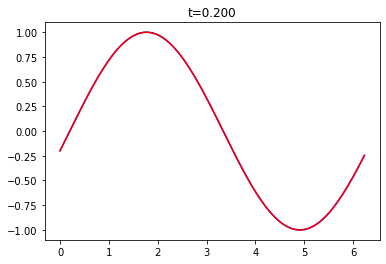

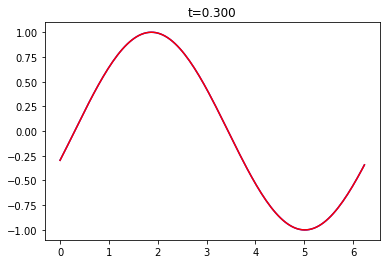

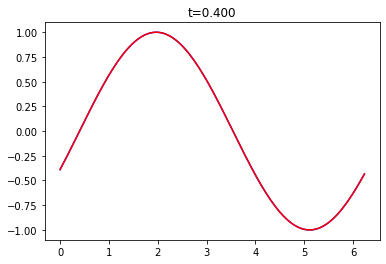

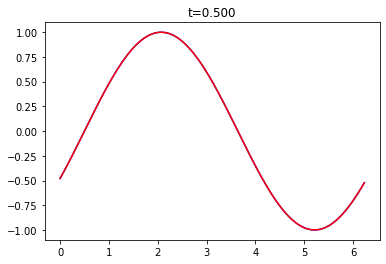

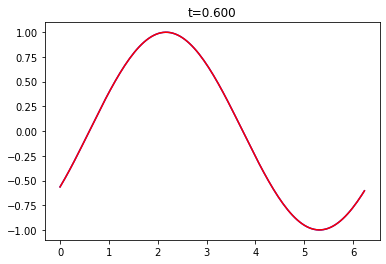

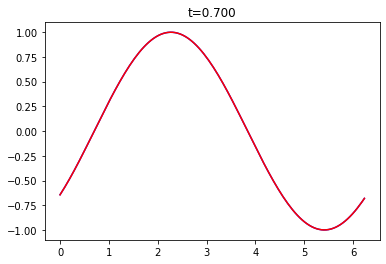

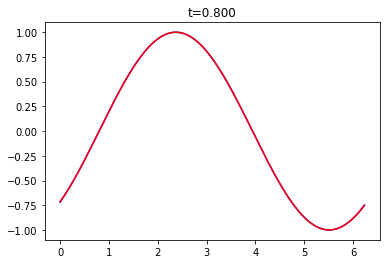

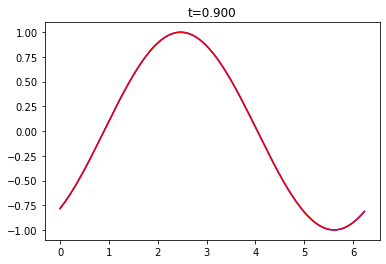

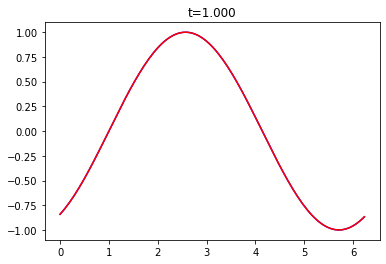

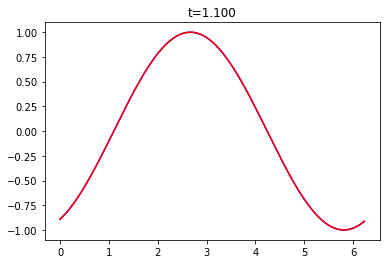

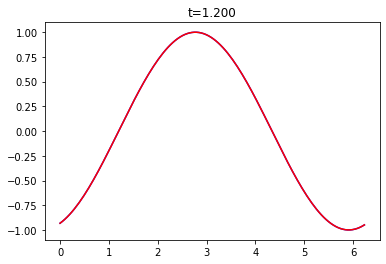

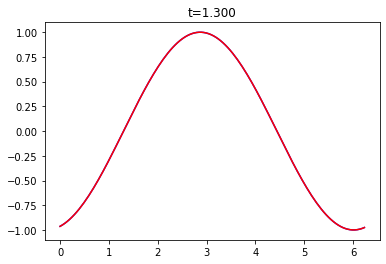

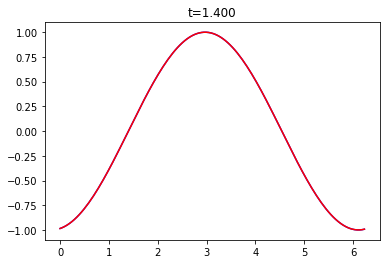

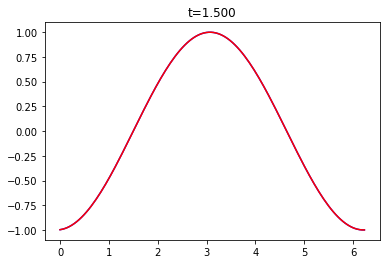

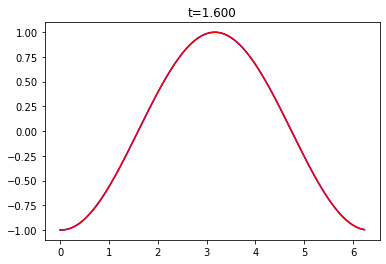

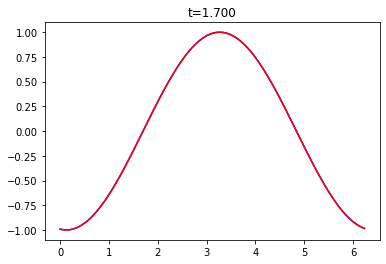

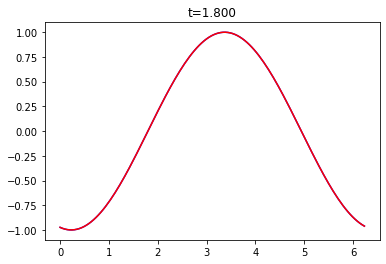

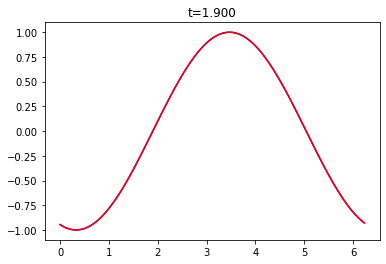

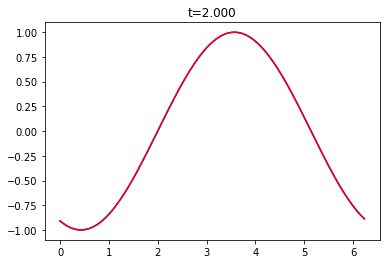

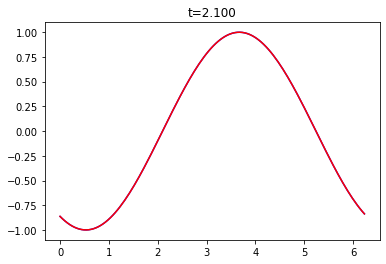

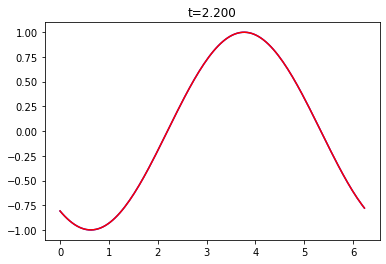

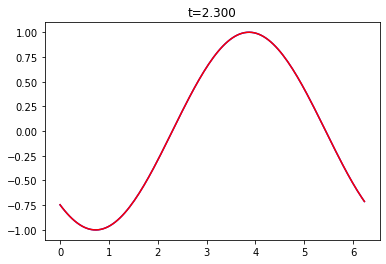

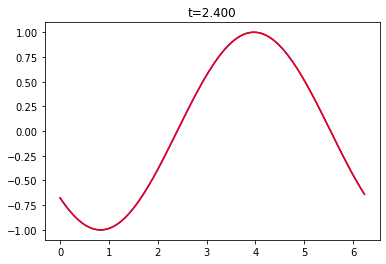

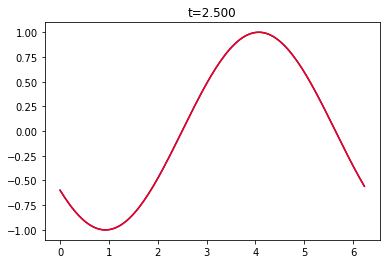

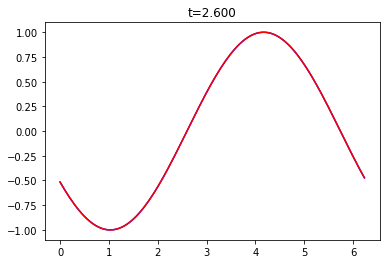

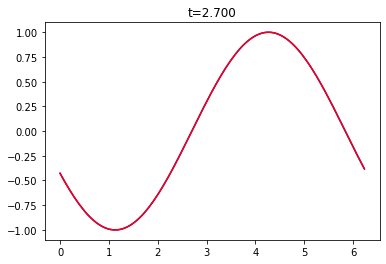

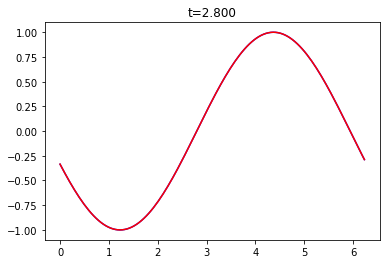

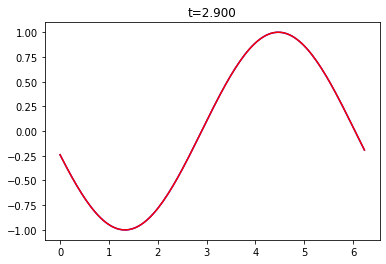

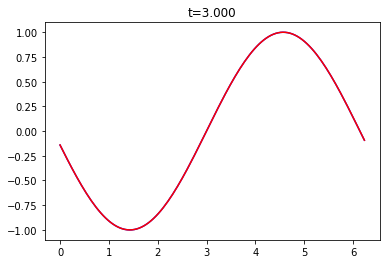

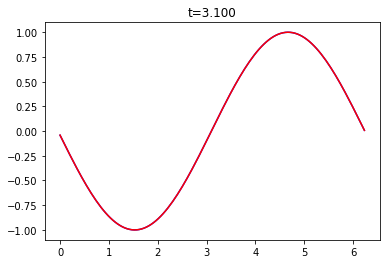

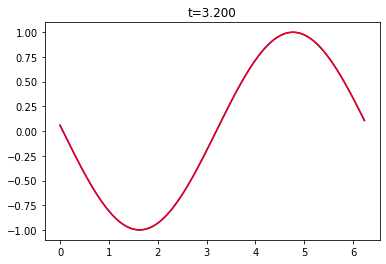

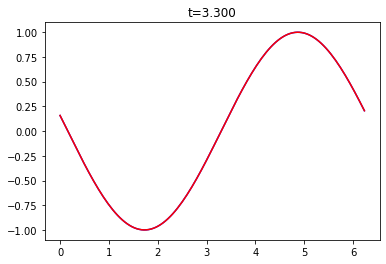

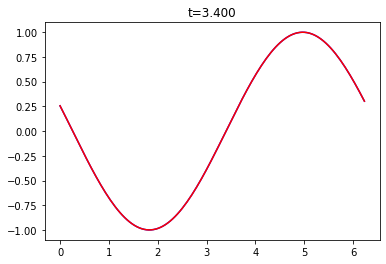

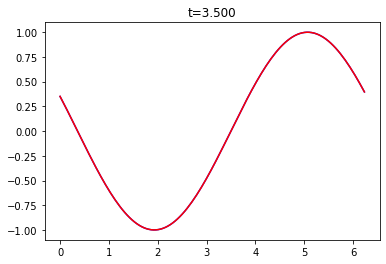

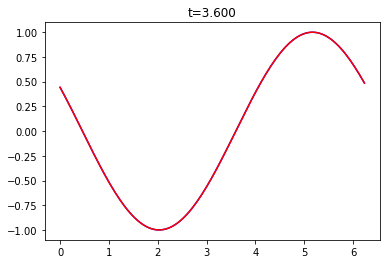

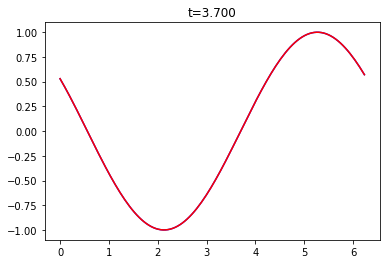

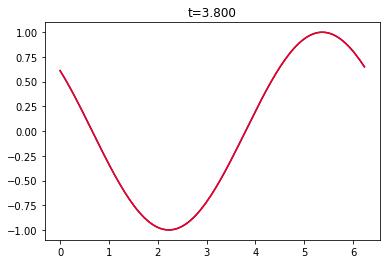

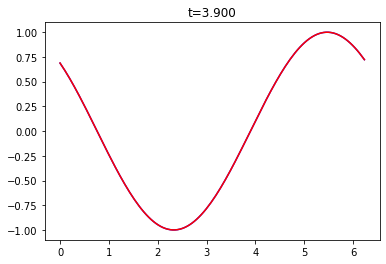

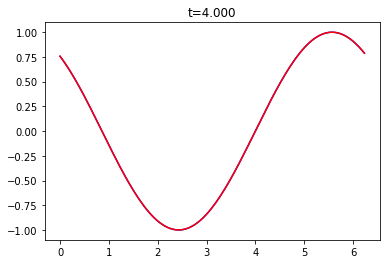

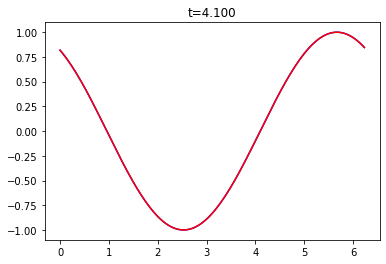

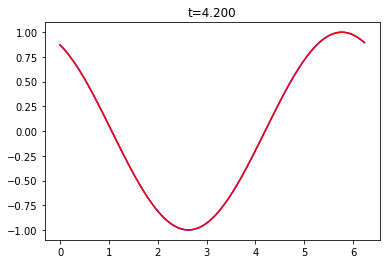

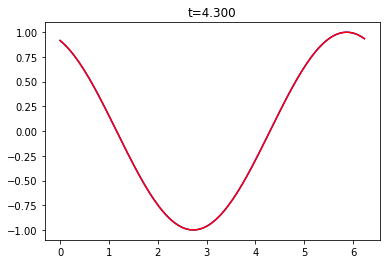

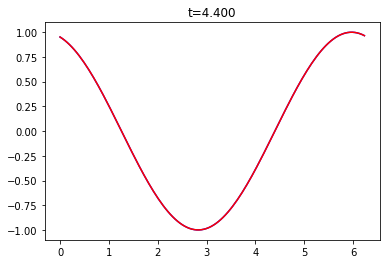

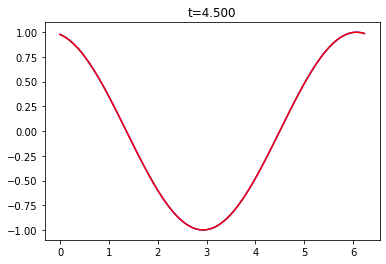

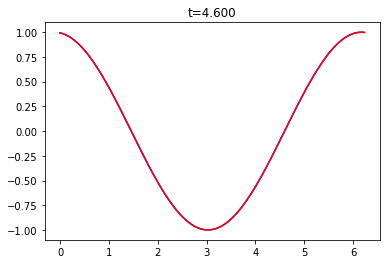

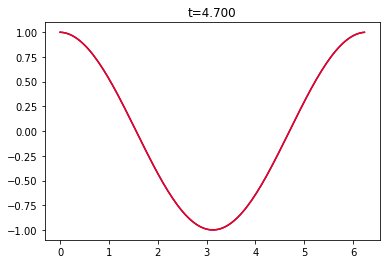

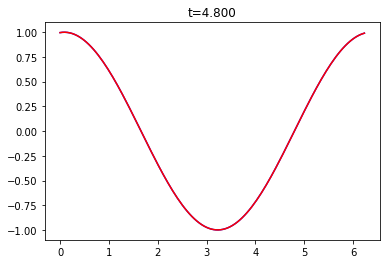

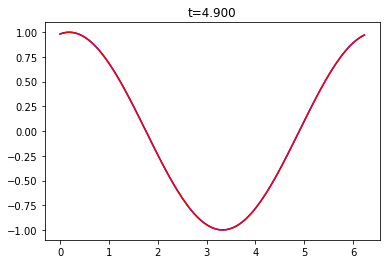

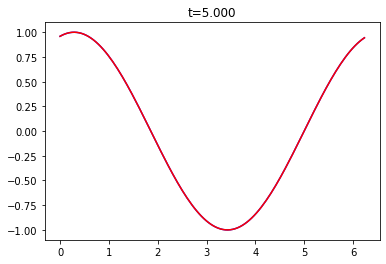

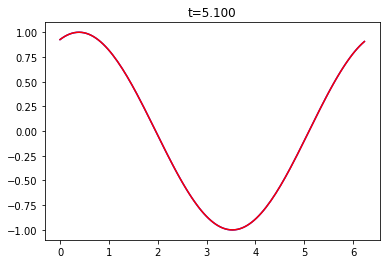

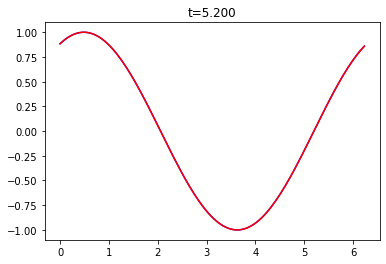

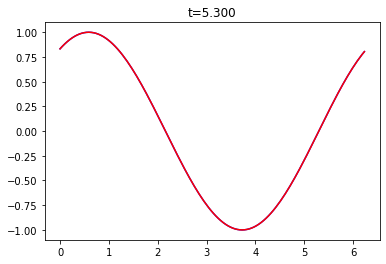

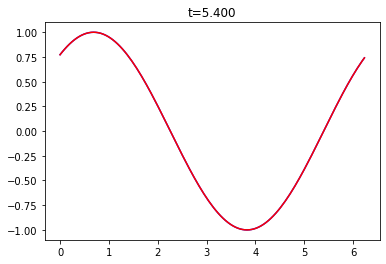

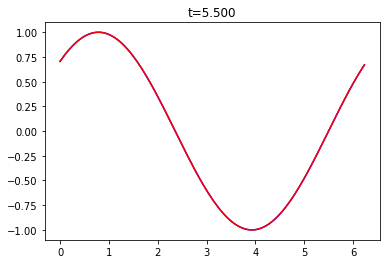

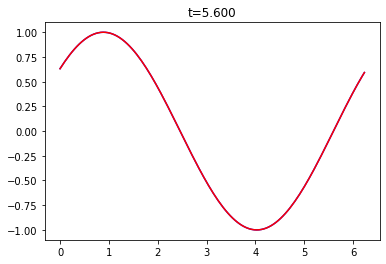

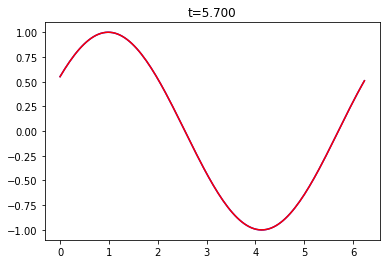

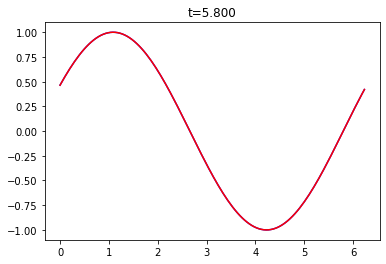

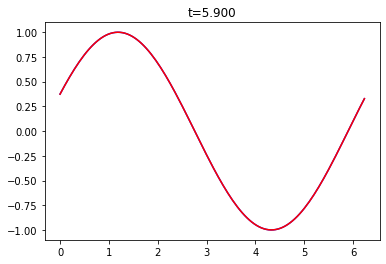

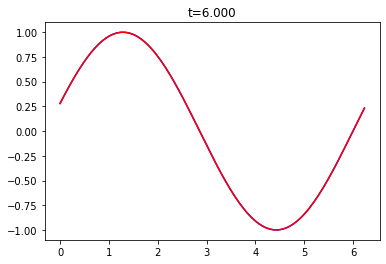

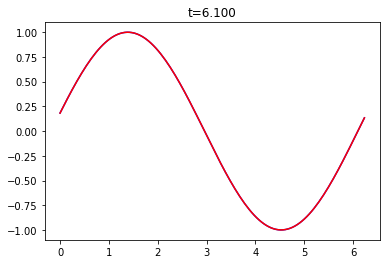

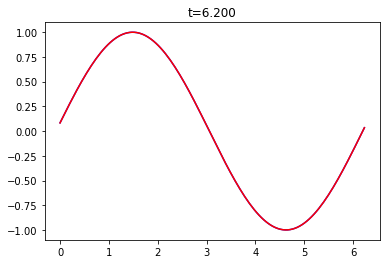

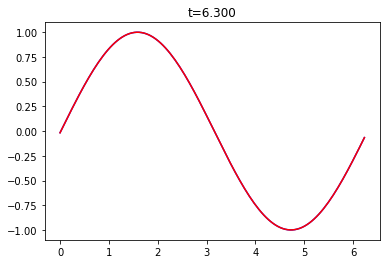

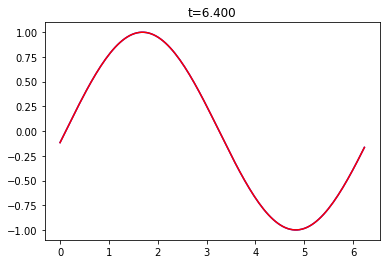

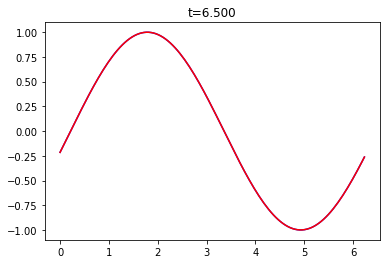

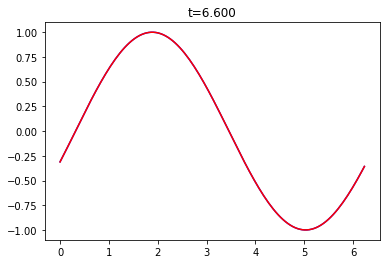

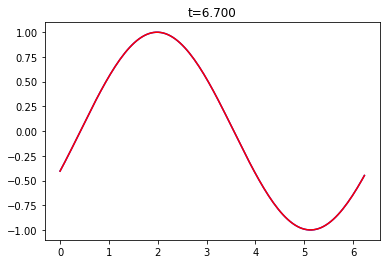

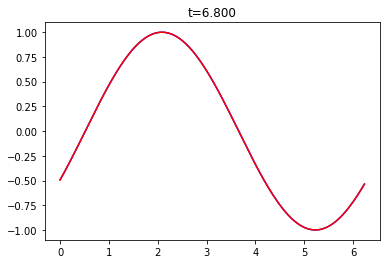

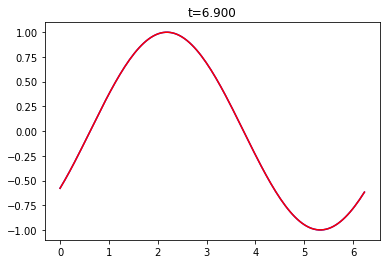

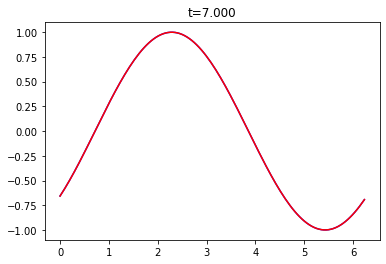

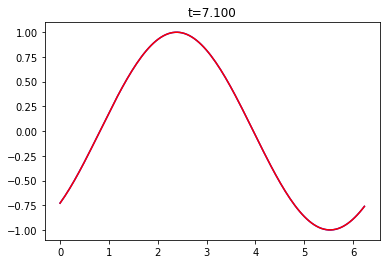

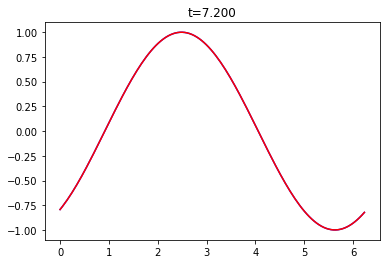

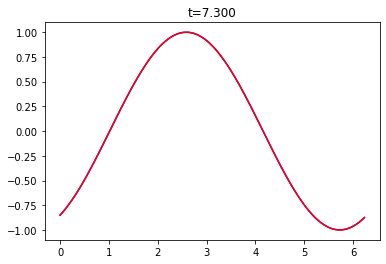

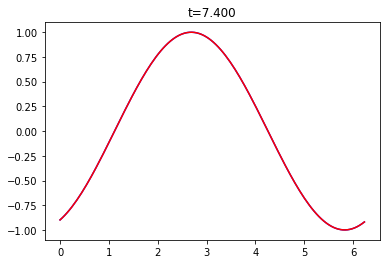

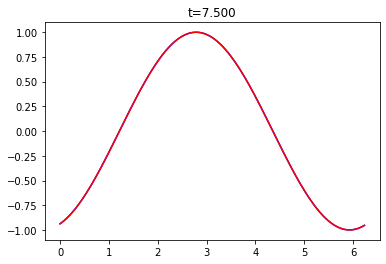

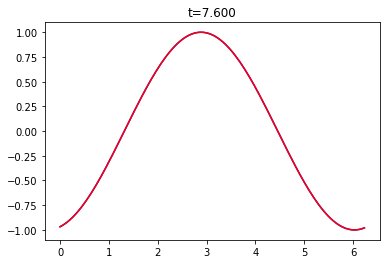

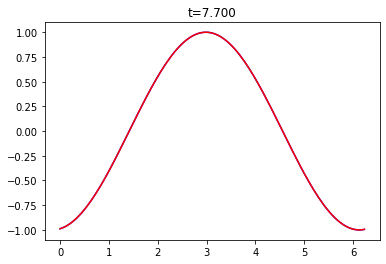

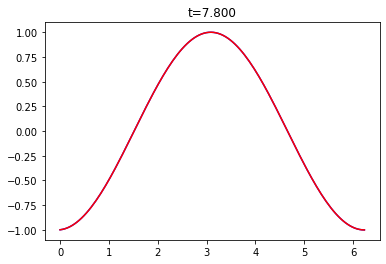

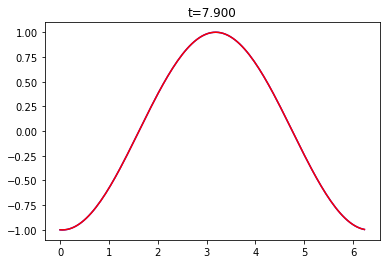

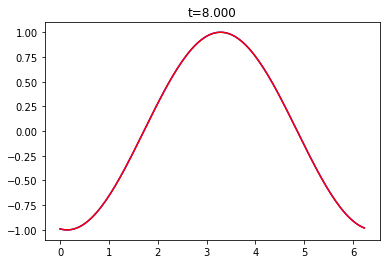

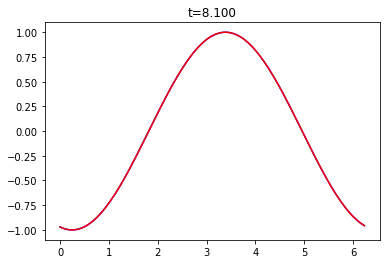

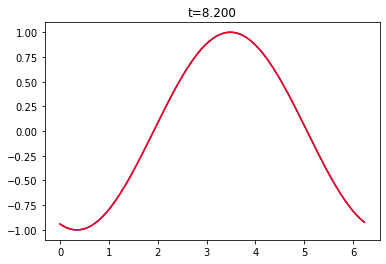

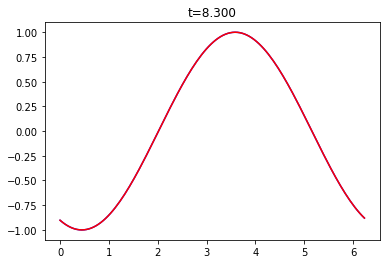

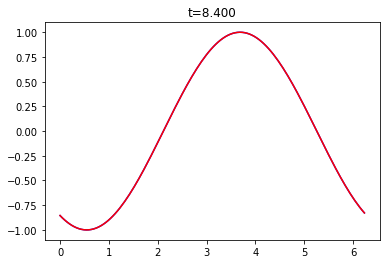

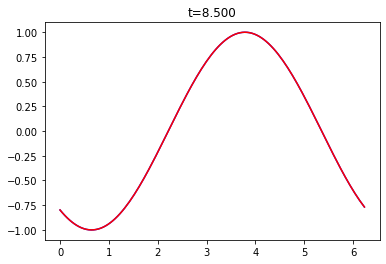

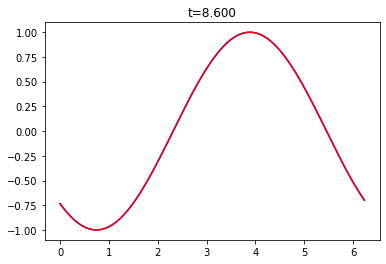

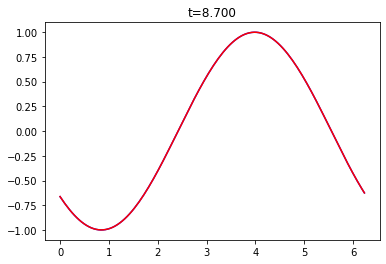

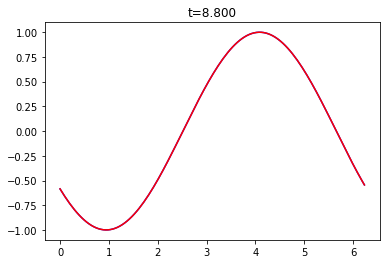

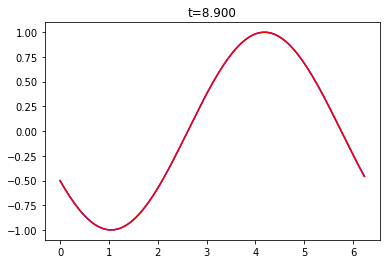

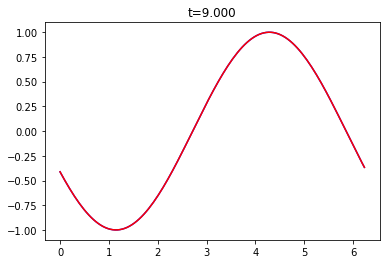

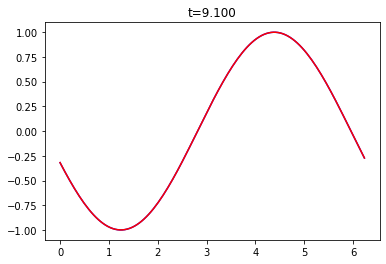

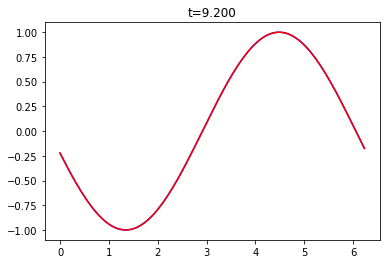

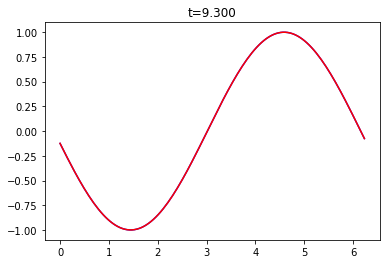

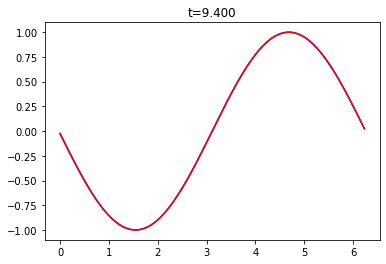

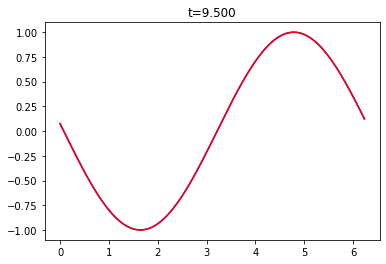

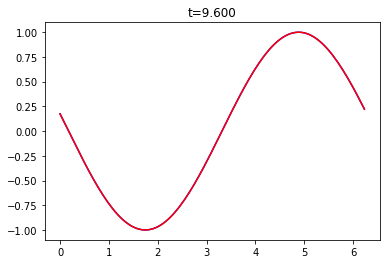

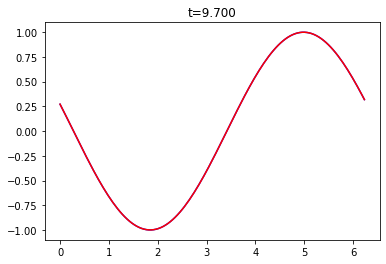

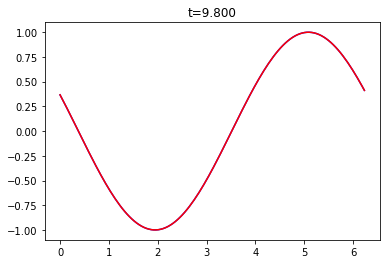

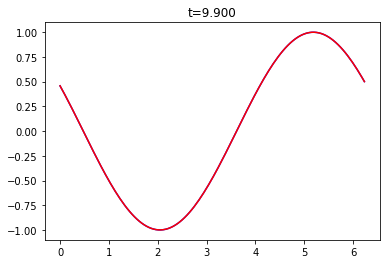

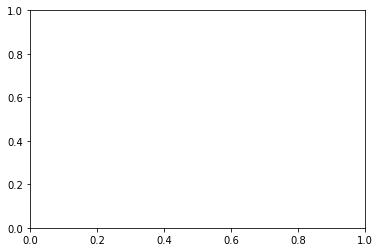

In [ ]:
#problem 3

'''Solve u_tt=u_xx spectrally with initial data u=sin(x) and u_t=cos(x) at t=0'''

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftfreq,fft,ifft

pi=np.pi
N=128
dx=2*pi/N
#list of wave numbers for that interval
k=fftfreq(N,d=1./N)

#space points
x=np.arange(0,N*dx,dx)

#time points
tMax=10
dt=0.0001
Nt=int(tMax/dt)

#initial condition
u=np.sin(x)
v=-np.cos(x) # v=u_t

#fourier transforms of u and v

uk=fft(u)
vk=fft(v)

#we need to solve u_t=v and v_t=u_xx
#so we need to define a get rhs function to get u_xx spectrally


def getrhs(u1):
    Ru=np.real(ifft(-(k**2)*fft(u1)))
    return Ru

#simeltaneous rk-4


for i in range(0,Nt):
    u1=u
    v1=v
    t=i*dt

    qu1=v1
    qv1=getrhs(u1)
    u1=u+dt*qu1/2
    v1=v+dt*qv1/2

    qu2=v1
    qv2=getrhs(u1)

    u1=u+dt*qu2/2
    v1=v+dt*qv2/2

    qu3=v1
    qv3=getrhs(u1)

    u1=u+dt*qu3
    v1=v+dt*qv3

    qu4=v1
    qv4=getrhs(u1)

    u=u+dt*(qu1+2*qu2+2*qu3+qu4)/6

    v=v+dt*(qv1+2*qv2+2*qv3+qv4)/6

    if (i%1000==0):
        w=np.sin(x-t)
        plt.plot(x,w,'b')
        plt.plot(x,u,'r')
        plt.title('t=%.3f' %t)
        plt.show()
        plt.pause(.5)
        plt.cla()





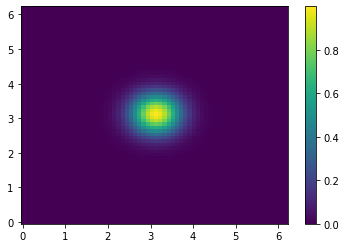

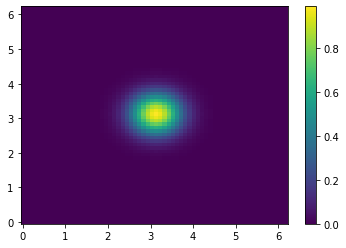

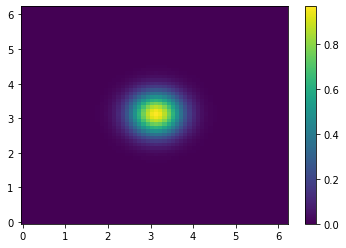

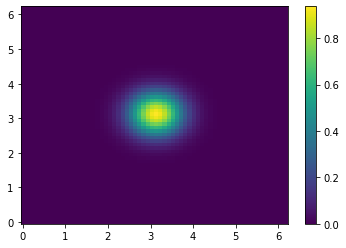

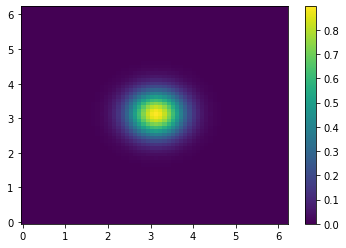

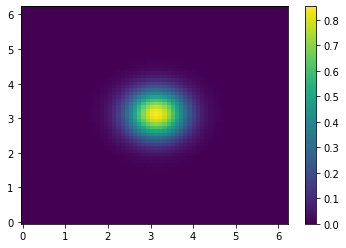

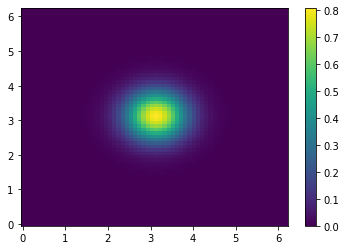

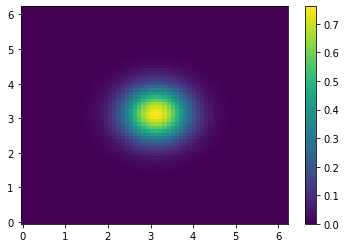

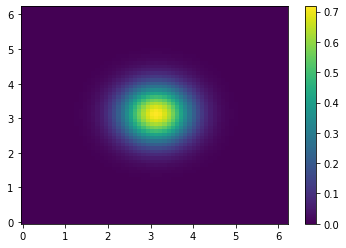

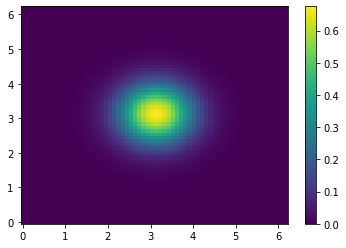

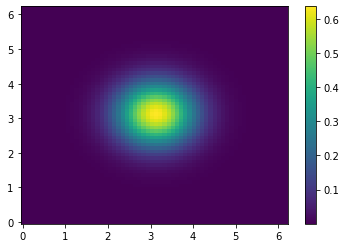

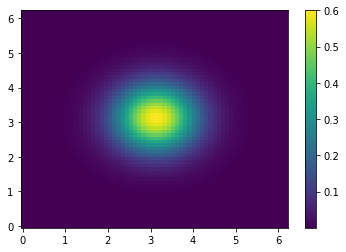

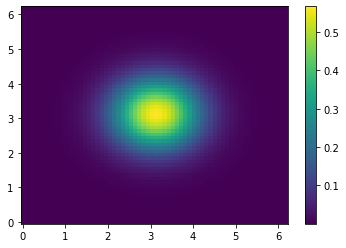

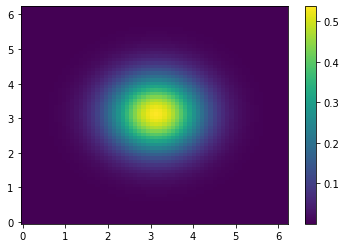

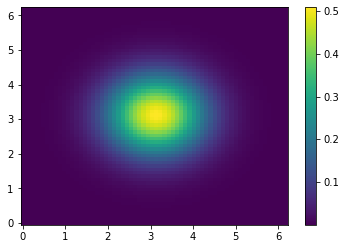

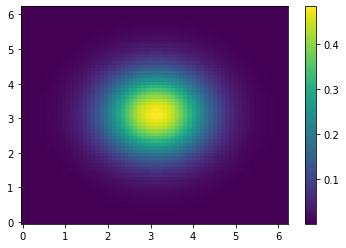

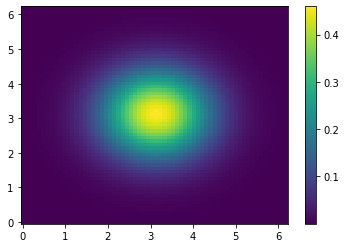

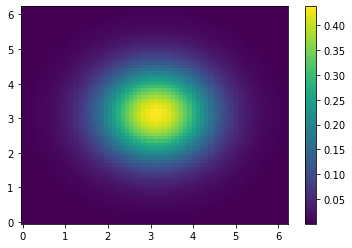

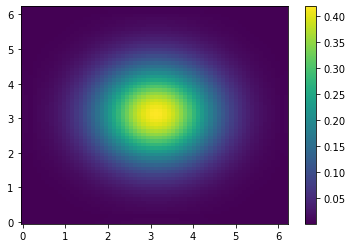

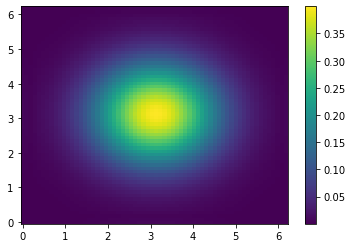

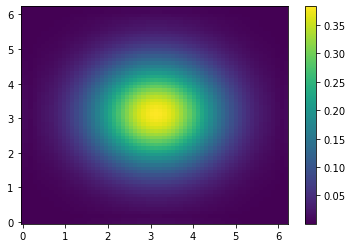

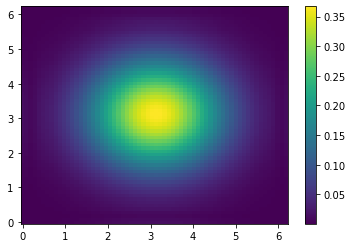

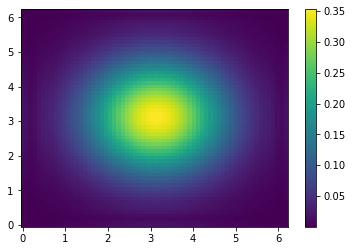

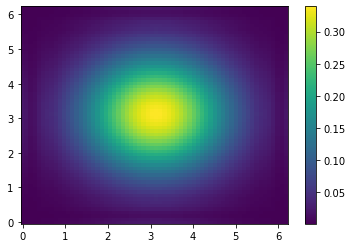

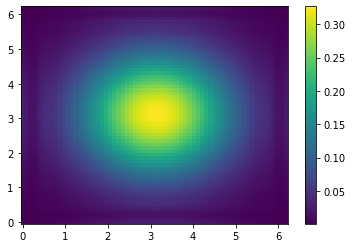

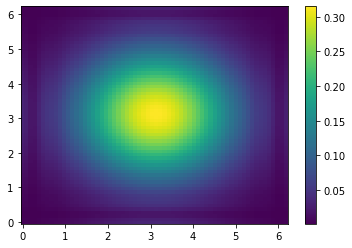

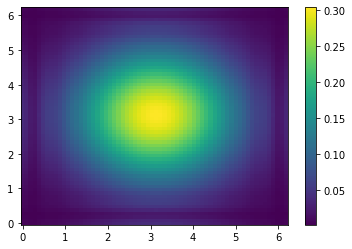

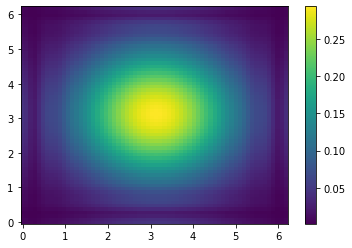

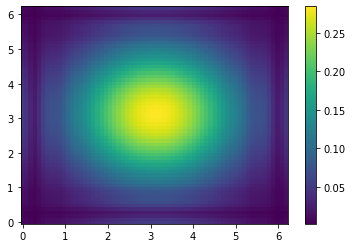

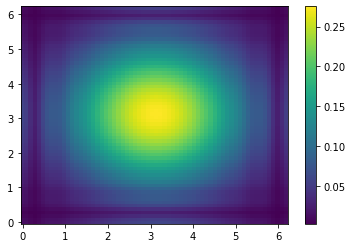

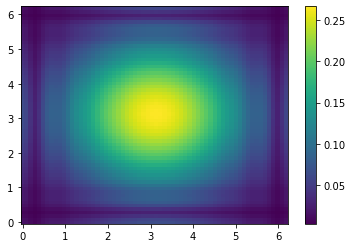

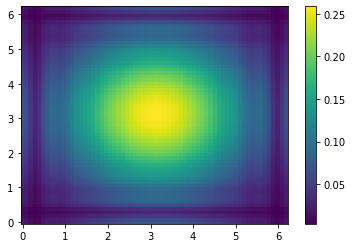

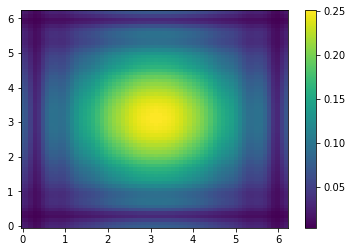

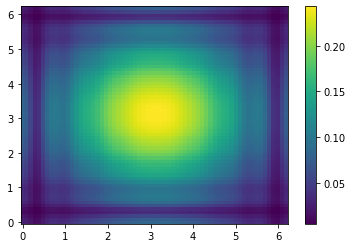

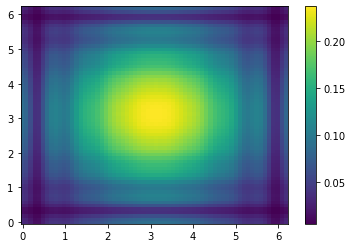

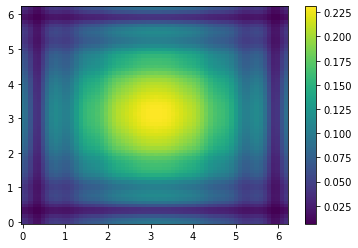

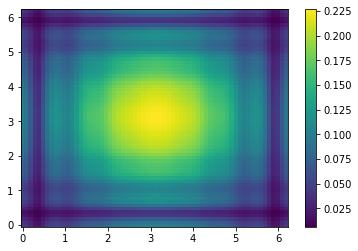

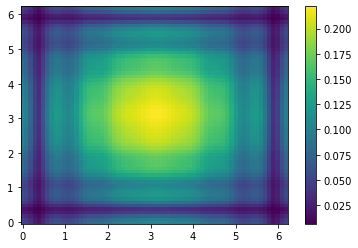

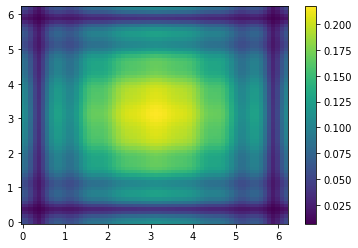

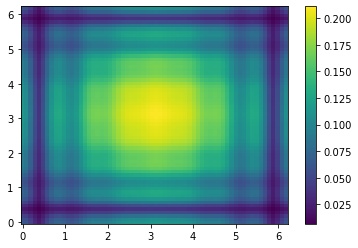

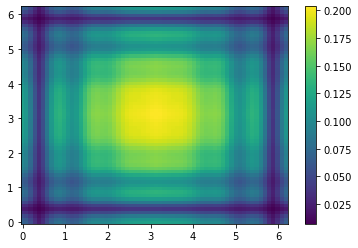

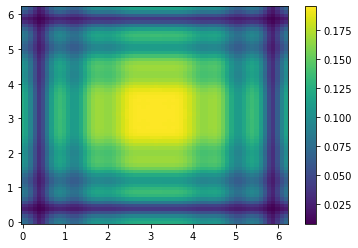

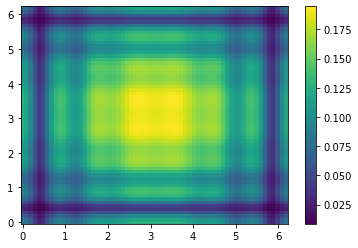

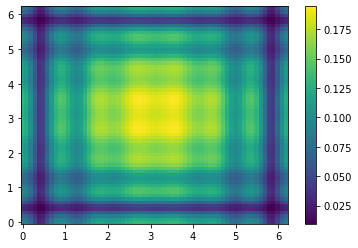

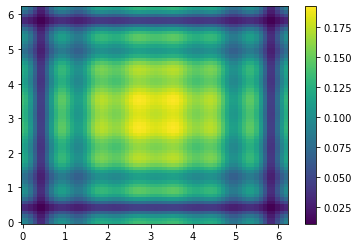

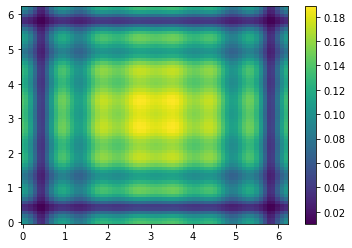

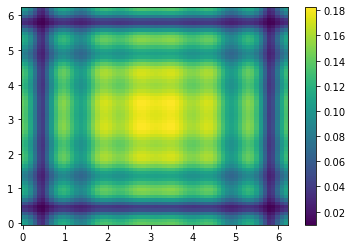

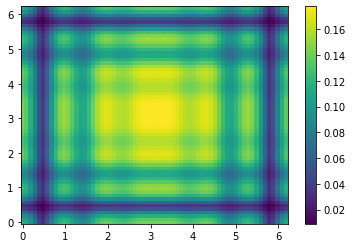

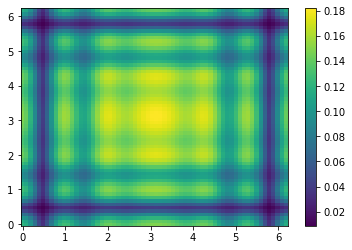

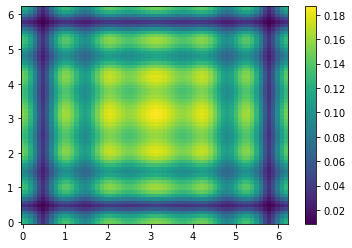

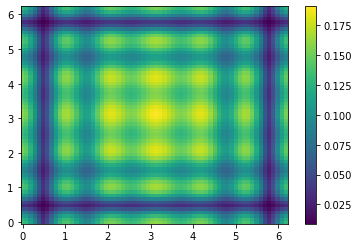

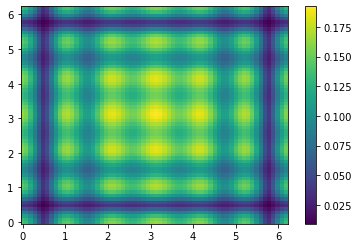

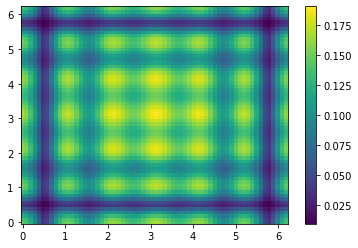

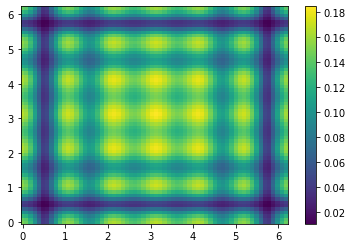

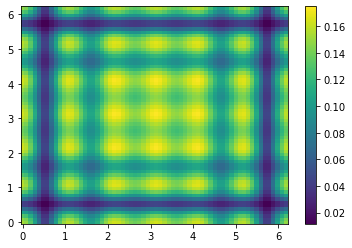

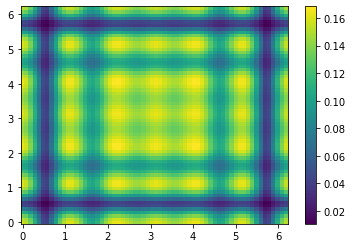

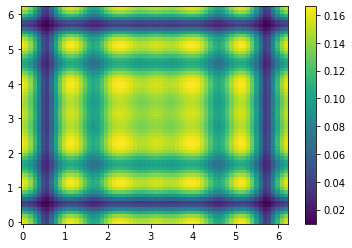

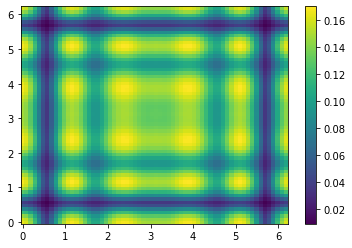

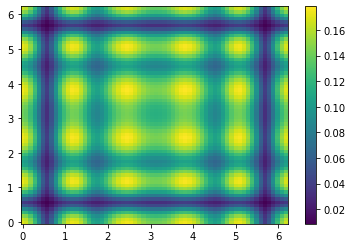

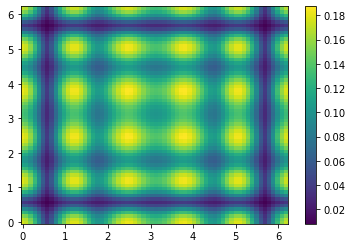

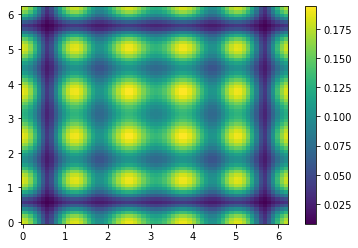

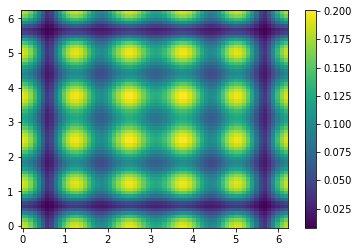

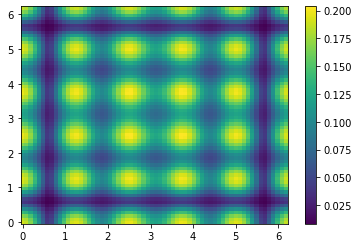

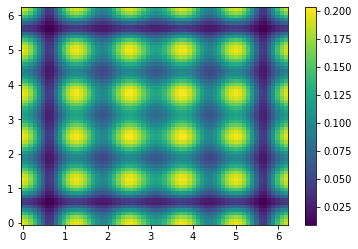

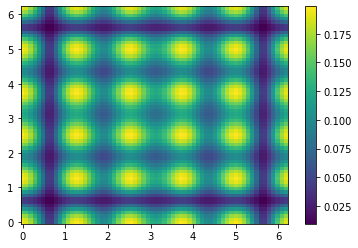

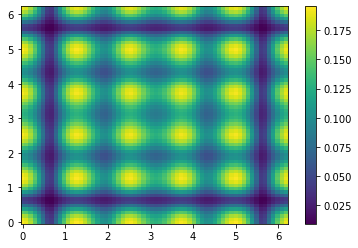

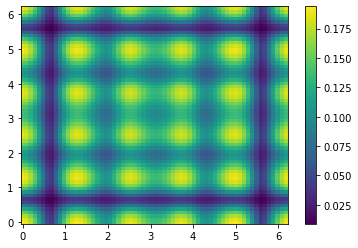

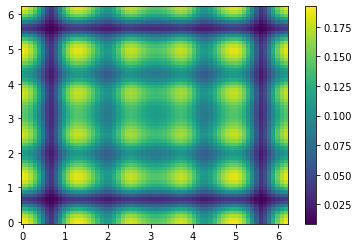

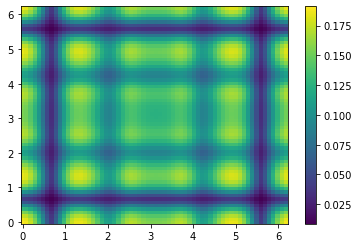

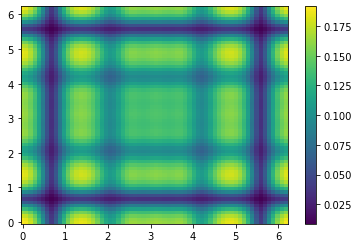

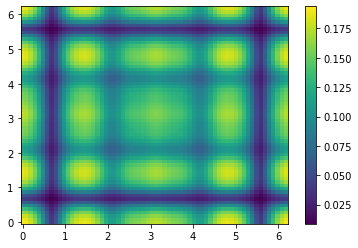

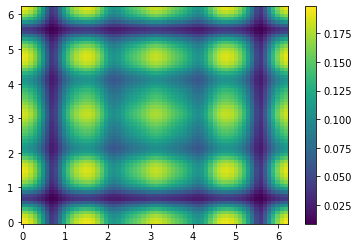

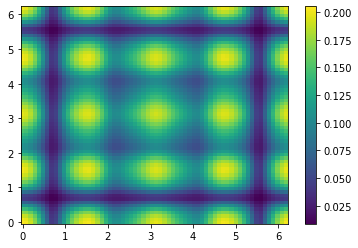

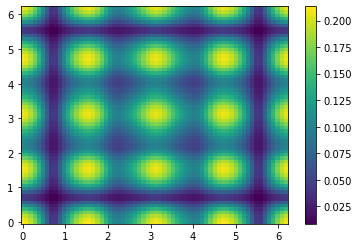

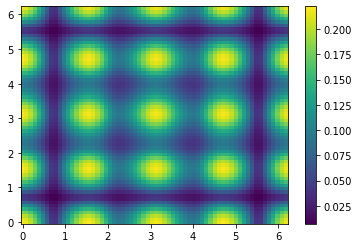

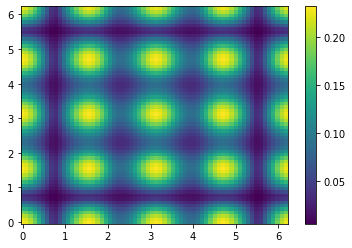

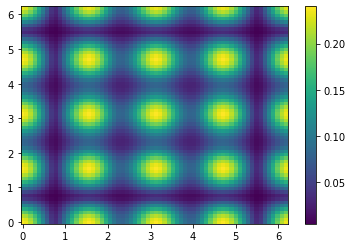

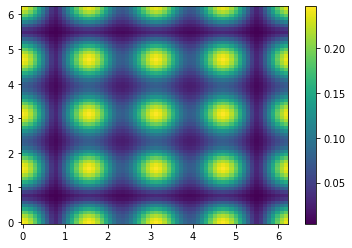

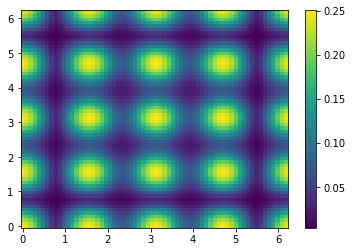

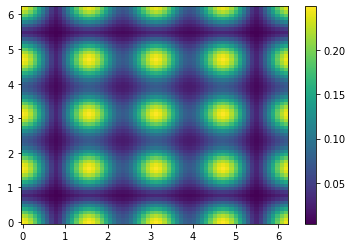

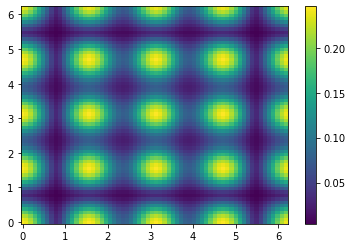

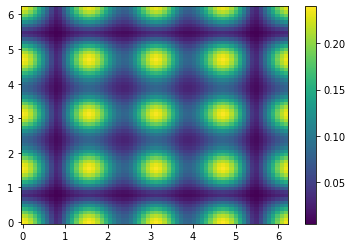

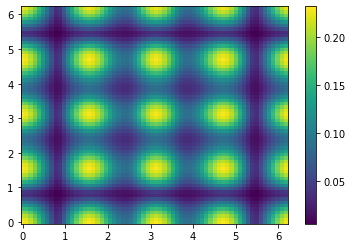

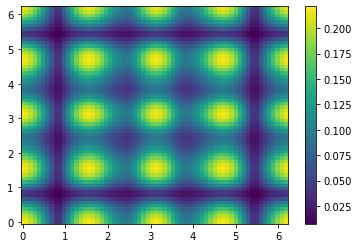

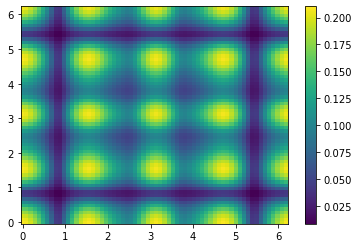

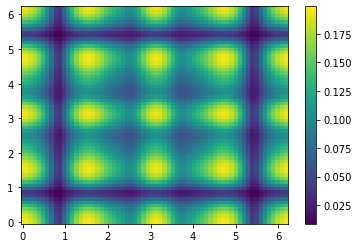

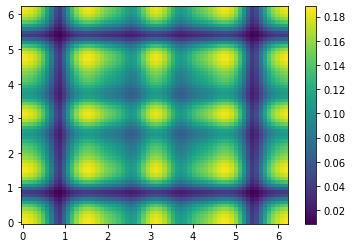

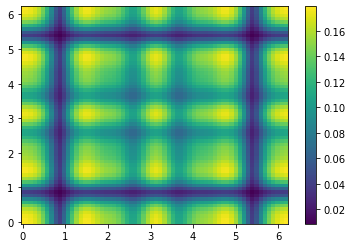

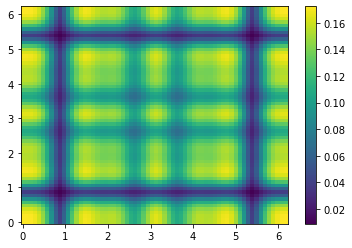

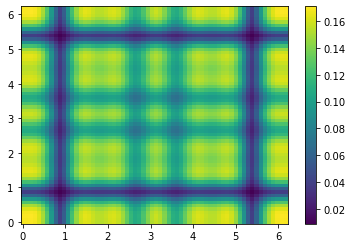

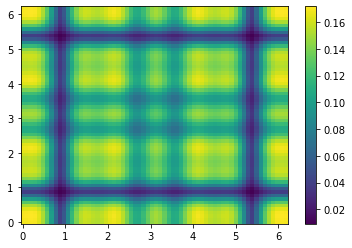

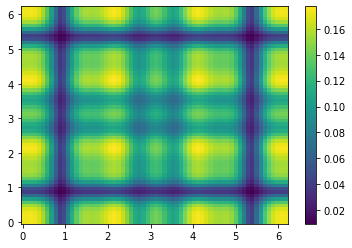

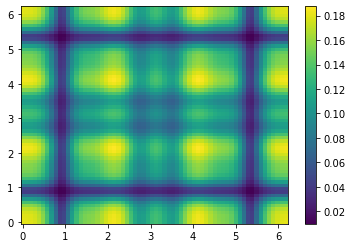

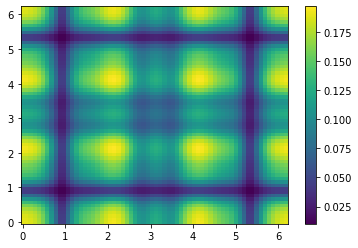

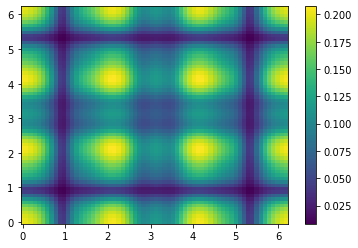

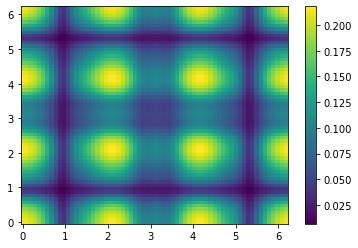

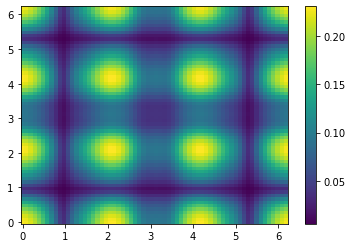

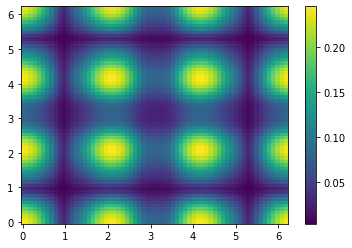

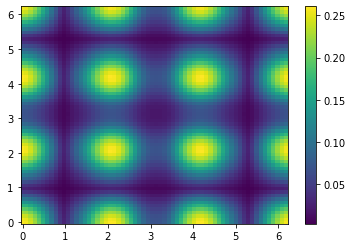

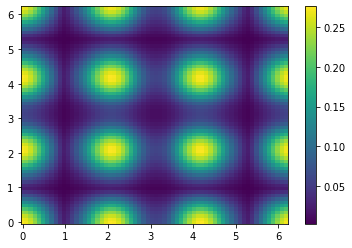

In [ ]:
#problem 4

''' Numerically integrate Schrodinger equation A_t=1j*Laplace(A) with initial :at t=0 A=exp(-3*(x**2+y**2))'''

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftfreq,fft,ifft,fft2,ifft2

pi=np.pi
N=64  #2d diffusion eqn
dx=2*pi/N
k=fftfreq(N,d=1./N)
kx,ky=np.meshgrid(k,k)
t=np.arange(0,N*dx,dx)
x,y=np.meshgrid(t,t)

K=np.sqrt(kx**2+ky**2)


global K

tMax=1
dt=0.001
Nt=int(tMax/dt)

u=np.exp(-3*((x-np.pi)**2+(y-np.pi)**2))

def getrhs2(u1):
    Ru=(ifft2(-(K**2)*fft2(1j*u1)))
    return Ru

for i in range(0,Nt):
    u1=u
    t=i*dt

    qu1=getrhs2(u1)
    u1=u+dt*qu1/2

    qu2=getrhs2(u1)
    u1=u+dt*qu2/2

    qu3=getrhs2(u1)
    u1=u+dt*qu3

    qu4=getrhs2(u1)

    u=u+dt*(qu1+2*qu2+2*qu3+qu4)/6

    if (i%10==0):
        #v=np.exp(-2*t)*np.sin(x)*np.sin(y)
        plt.pcolor(x,y,abs(u))
        plt.colorbar()
        plt.show()
        plt.pause(.5)
        plt.cla()
        plt.close("all")